In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.preprocessing import scale
from scipy import stats
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [2]:
bdf=pd.read_csv('/content/sample_data/battles.csv')
cddf=pd.read_csv('/content/sample_data/character-deaths.csv')
ddf=pd.read_csv("/content/sample_data/character-predictions.csv")

In [3]:
print('The no of columns and rows in battle csv :',bdf.shape)

print('The no of columns and rows in character csv :',cddf.shape)
print('The no of columns and rows in character predictions csv :',ddf.shape)

The no of columns and rows in battle csv : (38, 25)
The no of columns and rows in character csv : (917, 13)
The no of columns and rows in character predictions csv : (1946, 33)


In [4]:
print('Name of the columns in battle dataset: ', bdf.columns)
print('Name of the columns in charecter data set :', cddf.columns)
print('Name of the columns in character predictions data set :', ddf.columns)

Name of the columns in battle dataset:  Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')
Name of the columns in charecter data set : Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')
Name of the columns in character predictions data set : Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAlive

In [5]:
print('sneeking the 1st five rows of battels data :')
bdf.head()

sneeking the 1st five rows of battels data :


,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [6]:
print('sneeking the 1st five rows of battels data :')
cddf.head()

sneeking the 1st five rows of battels data :


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [7]:
print('sneeking the 1st five rows of battels data :')
ddf.head()

sneeking the 1st five rows of battels data :


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


In [8]:
print('sneeking the last five rows of battels data :')
bdf.tail()

sneeking the last five rows of battels data :


,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
33,Second Seige of Storm's End,300,34,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,siege,0.0,0.0,NaN,200.0,"Mace Tyrell, Mathis Rowan",Gilbert Farring,0.0,Storm's End,The Stormlands,NaN
34,Siege of Dragonstone,300,35,Joffrey/Tommen Baratheon,Stannis Baratheon,Baratheon,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,siege,0.0,0.0,2000.0,NaN,"Loras Tyrell, Raxter Redwyne",Rolland Storm,0.0,Dragonstone,The Stormlands,NaN
35,Siege of Riverrun,300,36,Joffrey/Tommen Baratheon,Robb Stark,Lannister,Frey,NaN,NaN,Tully,NaN,NaN,NaN,win,siege,0.0,0.0,3000.0,NaN,"Daven Lannister, Ryman Fey, Jaime Lannister",Brynden Tully,0.0,Riverrun,The Riverlands,NaN
36,Siege of Raventree,300,37,Joffrey/Tommen Baratheon,Robb Stark,Bracken,Lannister,NaN,NaN,Blackwood,NaN,NaN,NaN,win,siege,0.0,1.0,1500.0,NaN,"Jonos Bracken, Jaime Lannister",Tytos Blackwood,0.0,Raventree,The Riverlands,NaN
37,Siege of Winterfell,300,38,Stannis Baratheon,Joffrey/Tommen Baratheon,Baratheon,Karstark,Mormont,Glover,Bolton,Frey,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,8000.0,Stannis Baratheon,Roose Bolton,0.0,Winterfell,The North,NaN


In [9]:
print('sneeking the last five rows of Character deaths data :')
cddf.tail()

sneeking the last five rows of battels data :


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
912,Zollo,None,NaN,NaN,NaN,21.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0
916,Talbert Serry,Tyrell,300.0,4.0,29.0,29.0,1,1,0,0,0,1,0


In [10]:
print('sneeking the last five rows of Character predictions data :')
ddf.tail()

sneeking the last five rows of battels data :


,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,299.0,NaN,NaN,NaN,House Stark,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,299.0,NaN,NaN,NaN,House Bolton,NaN,0,1,0,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,0,0,1,1,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,0.130435,1
1945,1946,0,0,0.093,0.907,Tytos Lannister,Casterly Rock,1,NaN,220.0,267.0,NaN,NaN,NaN,House Lannister,Jeyne Marbrand,0,0,1,1,1,NaN,NaN,NaN,1.0,1,1,47.0,4,1,0,0.210702,0


In [11]:
print('finding the datatype and non- null count of each row: ')
bdf.info()

finding the datatype and non- null count of each row: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  majo

In [12]:
print('finding the datatype and non- null count of each row: ')
cddf.info()

finding the datatype and non- null count of each row: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [13]:
print('finding the datatype and non- null count of each row: ')
ddf.info()

finding the datatype and non- null count of each row: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               1946 non-null   int64  
 1   actual             1946 non-null   int64  
 2   pred               1946 non-null   int64  
 3   alive              1946 non-null   float64
 4   plod               1946 non-null   float64
 5   name               1946 non-null   object 
 6   title              938 non-null    object 
 7   male               1946 non-null   int64  
 8   culture            677 non-null    object 
 9   dateOfBirth        433 non-null    float64
 10  DateoFdeath        444 non-null    float64
 11  mother             21 non-null     object 
 12  father             26 non-null     object 
 13  heir               23 non-null     object 
 14  house              1519 non-null   object 
 15  spouse           

In [14]:
print('lets observed the no of battels along with name :')
pd.melt(frame=bdf, id_vars="year",value_vars="name")

lets observed the no of battels along with name :


,year,variable,value
0,298,name,Battle of the Golden Tooth
1,298,name,Battle at the Mummer's Ford
2,298,name,Battle of Riverrun
3,298,name,Battle of the Green Fork
4,298,name,Battle of the Whispering Wood
5,298,name,Battle of the Camps
6,298,name,Sack of Darry
7,299,name,Battle of Moat Cailin
8,299,name,Battle of Deepwood Motte
9,299,name,Battle of the Stony Shore


In [17]:
print('lets observed the no of battels along with name :')
pd.melt(frame=cddf, id_vars="Book Intro Chapter",value_vars="name")

lets observed the no of battels along with name :


,Book Intro Chapter,variable,value
0,56.0,DwD,0
1,49.0,DwD,0
2,5.0,DwD,1
3,20.0,DwD,1
4,NaN,DwD,0
...,...,...,...
912,21.0,DwD,0
913,47.0,DwD,1
914,25.0,DwD,1
915,73.0,DwD,0


In [22]:
print('lets observed the no of battels along with name :')
pd.melt(frame=ddf, id_vars="alive",value_vars="name")

lets observed the no of battels along with name :


,alive,variable,value
0,0.054,name,Viserys II Targaryen
1,0.387,name,Walder Frey
2,0.493,name,Addison Hill
3,0.076,name,Aemma Arryn
4,0.617,name,Sylva Santagar
...,...,...,...
1941,0.803,name,Luwin
1942,0.987,name,Reek
1943,0.520,name,Symeon Star-Eyes
1944,0.637,name,Coldhands


In [23]:
bdf.corr().style.background_gradient(cmap='Reds')

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
year,1.000000,0.906781,nan,nan,-0.341050,-0.166234,0.155841,-0.366048,-0.841912
battle_number,0.906781,1.000000,nan,nan,-0.270421,-0.105225,0.086418,-0.297730,-0.799090
defender_3,nan,nan,nan,nan,nan,nan,nan,nan,nan
defender_4,nan,nan,nan,nan,nan,nan,nan,nan,nan
major_death,-0.341050,-0.270421,nan,nan,1.000000,0.264464,0.267966,0.081815,0.337136
major_capture,-0.166234,-0.105225,nan,nan,0.264464,1.000000,0.331961,0.249510,0.142112
attacker_size,0.155841,0.086418,nan,nan,0.267966,0.331961,1.000000,-0.112118,-0.273054
defender_size,-0.366048,-0.297730,nan,nan,0.081815,0.249510,-0.112118,1.000000,0.347108
summer,-0.841912,-0.799090,nan,nan,0.337136,0.142112,-0.273054,0.347108,1.000000


In [24]:
cddf.corr().style.background_gradient(cmap='Reds')

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
Death Year,1.000000,0.832274,-0.068763,0.051674,-0.135058,0.042457,-0.439234,0.077509,0.313062,0.357204,0.550213
Book of Death,0.832274,1.000000,-0.207666,0.016975,-0.111461,0.017475,-0.434004,-0.131860,0.350095,0.340436,0.714574
Death Chapter,-0.068763,-0.207666,1.000000,0.388283,-0.086533,0.075943,0.126657,0.012939,-0.149095,-0.167285,-0.145384
Book Intro Chapter,0.051674,0.016975,0.388283,1.000000,0.058684,-0.068825,0.129241,0.002445,0.158419,-0.146165,-0.077509
Gender,-0.135058,-0.111461,-0.086533,0.058684,1.000000,-0.060213,0.070228,0.063424,-0.049199,-0.040289,-0.046924
Nobility,0.042457,0.017475,0.075943,-0.068825,-0.060213,1.000000,0.087201,0.055179,0.046825,0.146088,-0.001880
GoT,-0.439234,-0.434004,0.126657,0.129241,0.070228,0.087201,1.000000,0.121257,0.004696,-0.088852,-0.120242
CoK,0.077509,-0.131860,0.012939,0.002445,0.063424,0.055179,0.121257,1.000000,-0.002049,-0.083669,-0.107276
SoS,0.313062,0.350095,-0.149095,0.158419,-0.049199,0.046825,0.004696,-0.002049,1.000000,-0.074585,-0.013294
FfC,0.357204,0.340436,-0.167285,-0.146165,-0.040289,0.146088,-0.088852,-0.083669,-0.074585,1.000000,-0.109387


In [25]:
ddf.corr().style.background_gradient(cmap='Reds')

,S.No,actual,pred,alive,plod,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
S.No,1.000000,-0.128708,-0.168569,-0.181493,0.181493,0.117225,0.068381,0.092455,0.290130,0.312403,0.368665,0.284554,0.405907,0.289094,-0.096596,-0.138287,0.033193,0.150648,0.241642,-0.067925,0.092734,0.171157,0.170451,0.277761,-0.128712
actual,-0.128708,1.000000,0.359028,0.420795,-0.420795,-0.144552,-0.086315,nan,-0.147401,-0.067200,0.006693,0.268975,0.032846,-0.043033,0.195992,0.384900,0.174275,-0.050037,-0.042211,0.087712,-0.192444,-0.193736,-0.153860,-0.183174,0.997291
pred,-0.168569,0.359028,1.000000,0.894427,-0.894427,-0.193754,-0.072865,-0.084974,-0.220113,-0.107290,0.008003,0.307838,-0.089181,nan,0.225374,0.155700,0.160442,-0.125874,-0.111793,0.073884,-0.260960,-0.276936,-0.286736,-0.344108,0.356483
alive,-0.181493,0.420795,0.894427,1.000000,-1.000000,-0.199020,-0.040937,-0.104955,-0.241441,-0.143350,-0.026135,0.404151,-0.059397,0.208228,0.352599,0.211490,0.181908,-0.161908,-0.101990,0.042181,-0.277407,-0.292399,-0.281480,-0.354584,0.417318
plod,0.181493,-0.420795,-0.894427,-1.000000,1.000000,0.199020,0.040937,0.104955,0.241441,0.143350,0.026135,-0.404151,0.059397,-0.208228,-0.352599,-0.211490,-0.181908,0.161908,0.101990,-0.042181,0.277407,0.292399,0.281480,0.354584,-0.417318
male,0.117225,-0.144552,-0.193754,-0.199020,0.199020,1.000000,-0.084351,-0.000429,0.084876,0.060322,0.023364,-0.063178,0.062387,-0.141421,0.097590,nan,0.259169,-0.081611,0.156171,0.084367,0.041736,0.053249,0.129207,0.140828,-0.146982
dateOfBirth,0.068381,-0.086315,-0.072865,-0.040937,0.040937,-0.084351,1.000000,-0.010284,0.101590,0.055825,-0.022845,-0.032140,-0.008324,nan,nan,nan,0.275833,-0.043918,-0.067865,-0.999997,0.062941,0.047255,-0.028783,-0.015658,-0.085863
DateoFdeath,0.092455,nan,-0.084974,-0.104955,0.104955,-0.000429,-0.010284,1.000000,0.135993,-0.042945,-0.052567,-0.078172,-0.028247,nan,nan,nan,0.080052,0.018702,-0.097912,0.010418,0.045508,0.032812,0.053065,0.031211,nan
book1,0.290130,-0.147401,-0.220113,-0.241441,0.241441,0.084876,0.101590,0.135993,1.000000,0.392439,0.243843,0.079959,0.264818,nan,-0.097590,nan,0.082209,0.085895,0.095848,-0.101148,0.191853,0.241630,0.252426,0.324782,-0.147401
book2,0.312403,-0.067200,-0.107290,-0.143350,0.143350,0.060322,0.055825,-0.042945,0.392439,1.000000,0.449931,0.175937,0.225677,nan,-0.097590,nan,0.057321,0.157045,0.023366,-0.054744,0.075281,0.124040,0.139210,0.247918,-0.067200


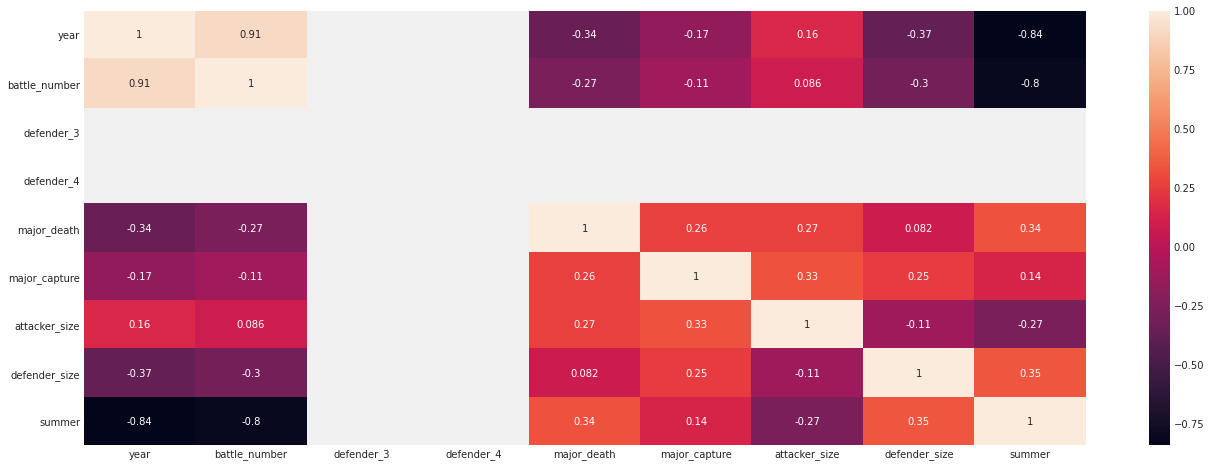

In [26]:
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(bdf.corr(),annot=True);

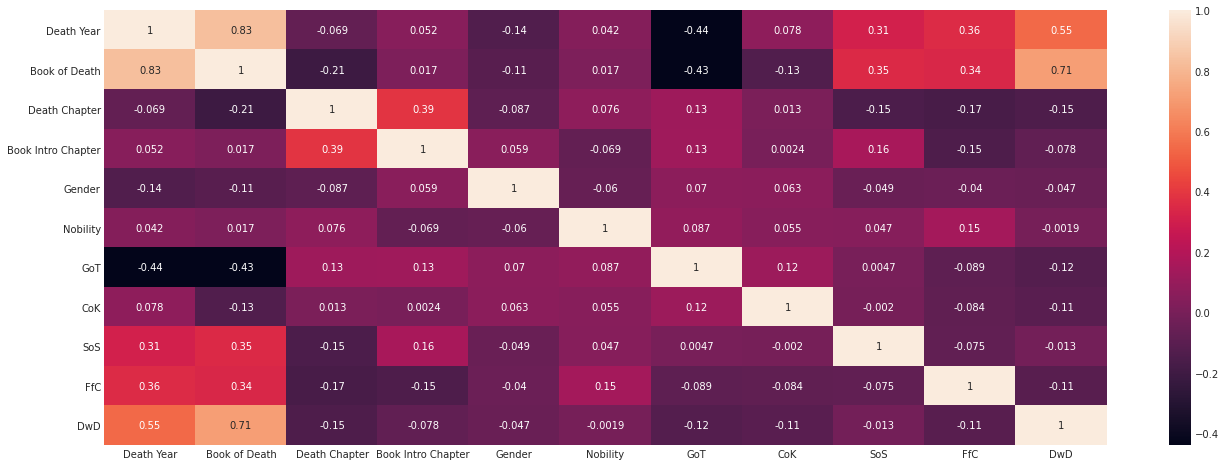

In [27]:
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(cddf.corr(),annot=True);

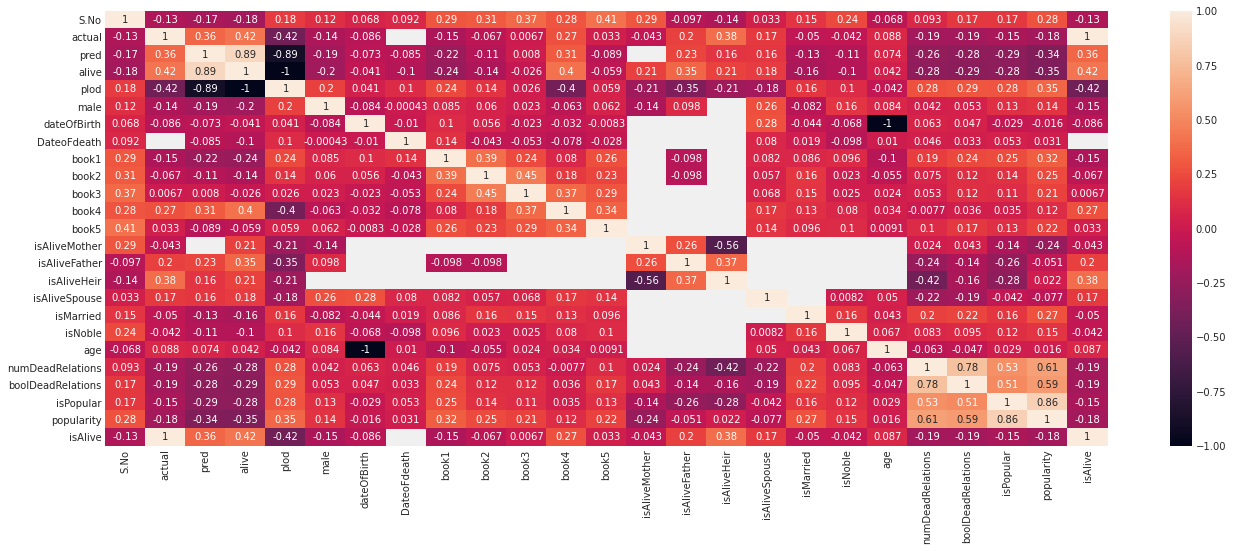

In [28]:
fig,ax=plt.subplots(figsize=(20,8))
sns.heatmap(ddf.corr(),annot=True);

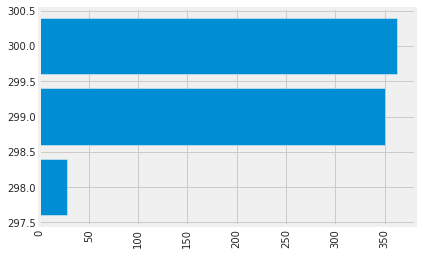

In [32]:
bpy=bdf.groupby('year',as_index=False).sum()
plt.barh(bpy['year'],bpy['battle_number'])
plt.xticks(rotation=90);

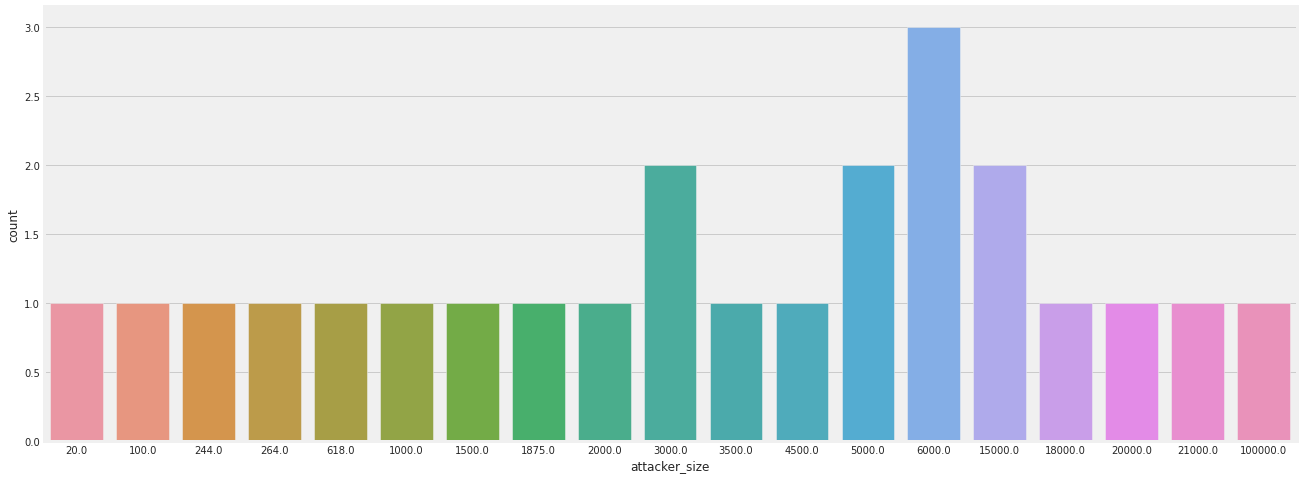

In [34]:
#attacker size count..
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_size']);

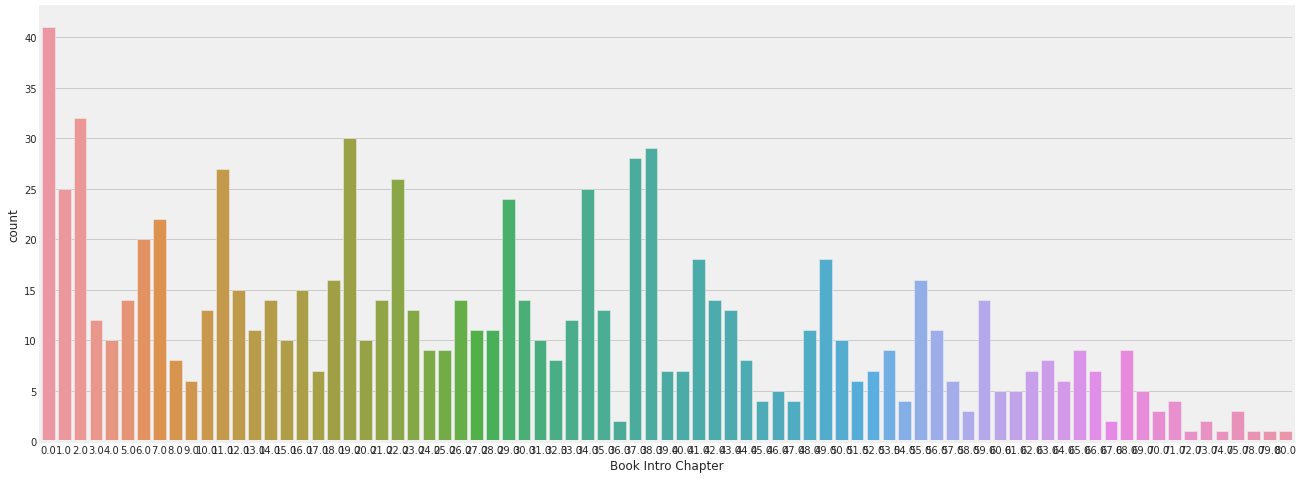

In [37]:
#attacker size count..
plt.figure(figsize=(20,8))
sns.countplot(cddf['Book Intro Chapter']);

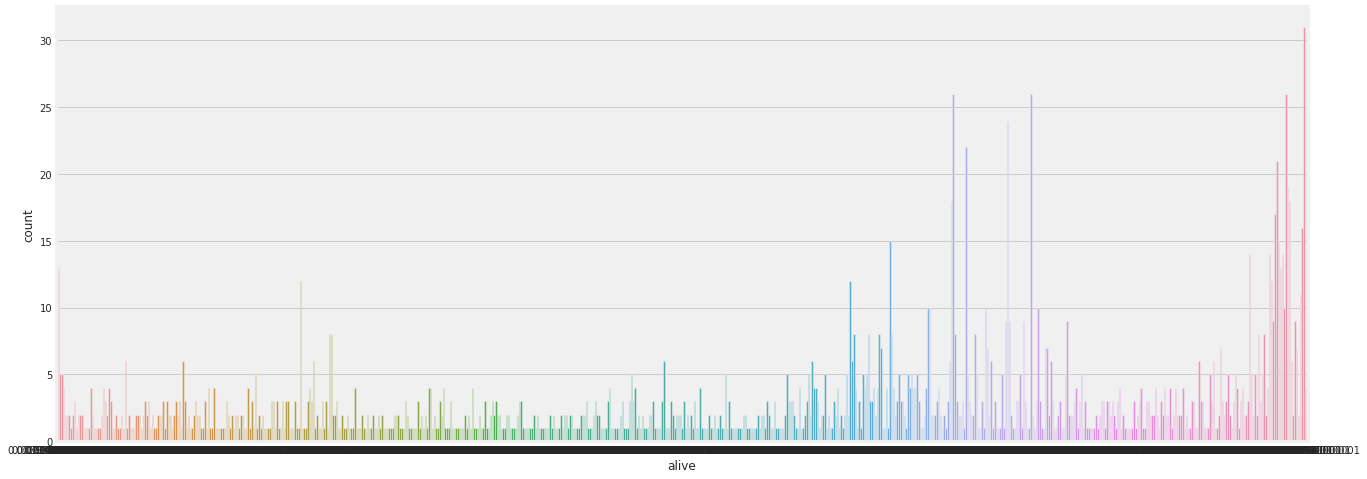

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(ddf['alive']);

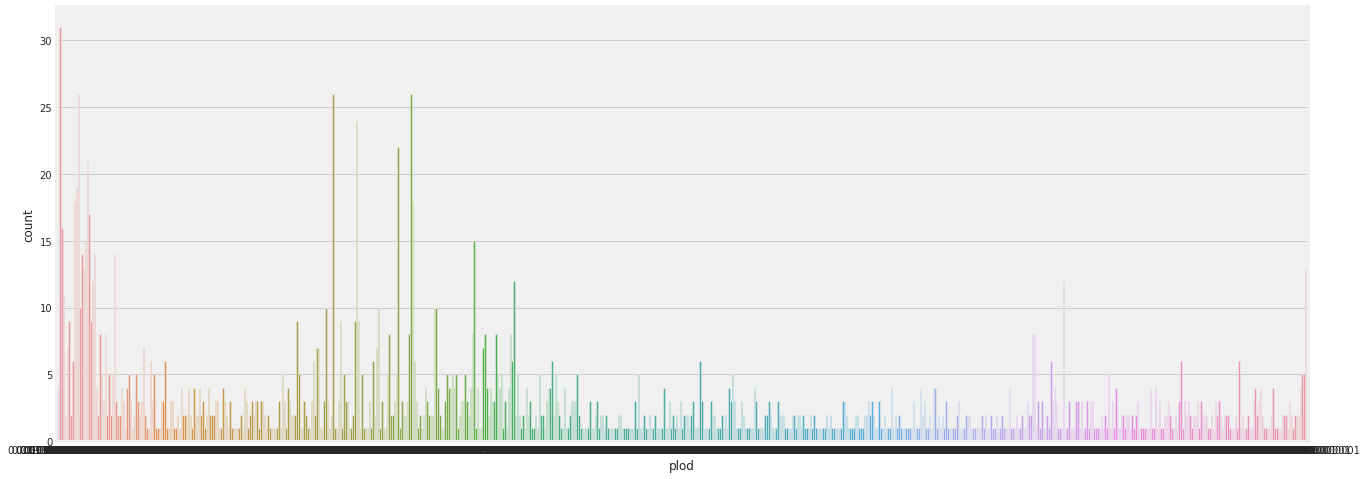

In [42]:
plt.figure(figsize=(20,8))
sns.countplot(ddf['plod']);

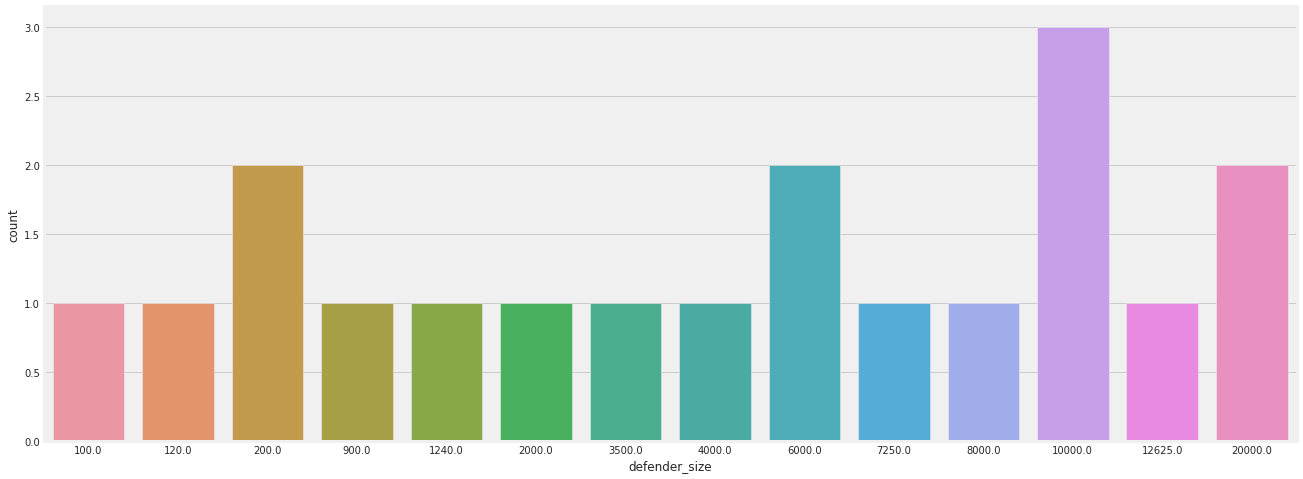

In [43]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['defender_size']);

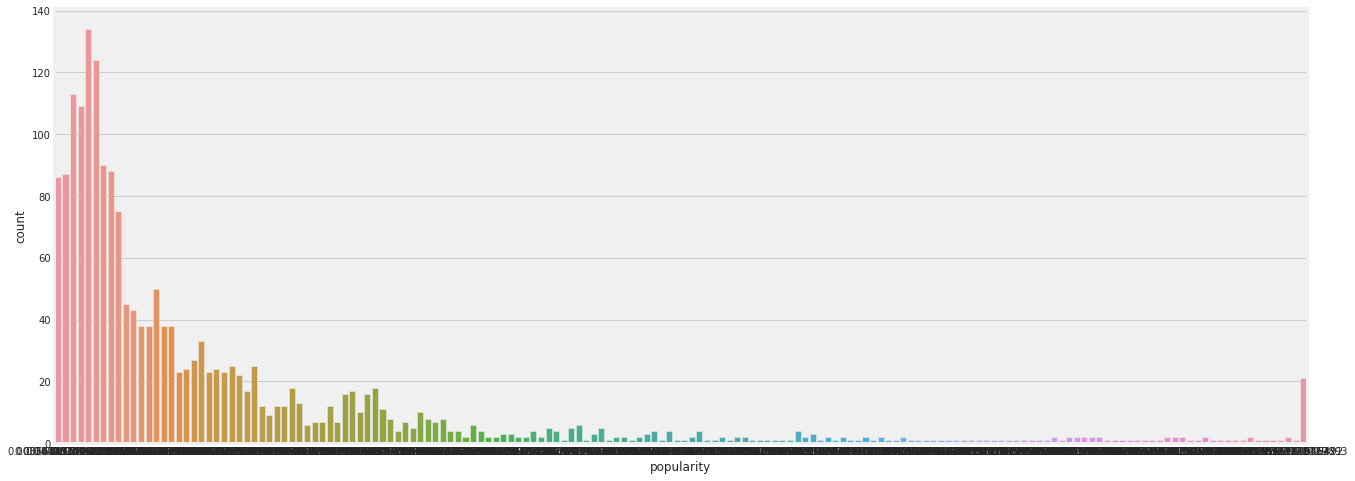

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(ddf['popularity']);

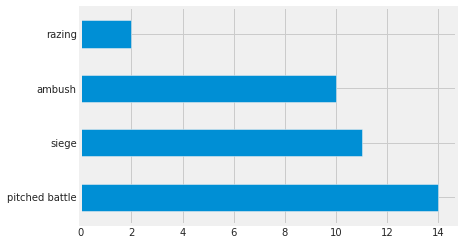

In [44]:
bdf['battle_type'].value_counts().plot(kind = 'barh');

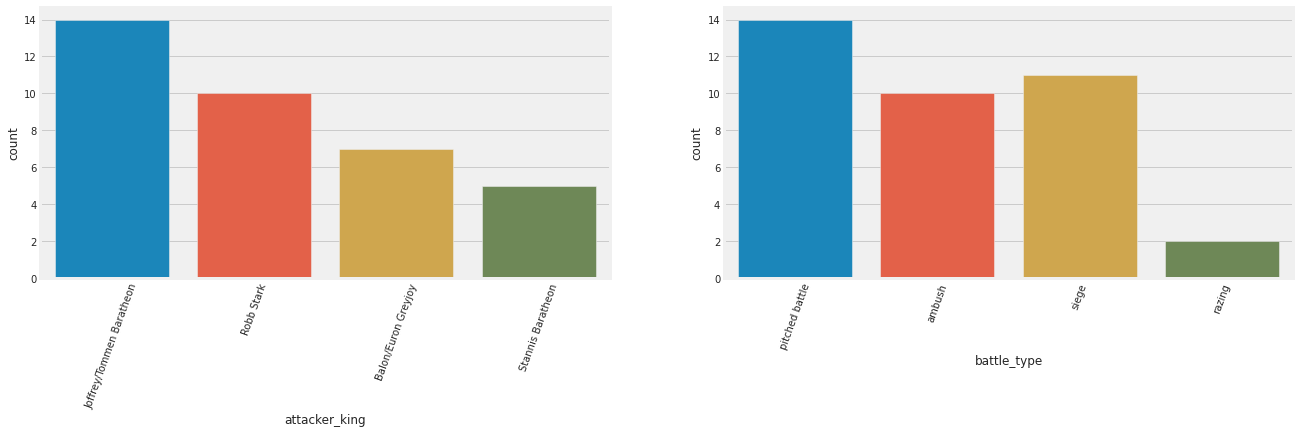

In [45]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(bdf['attacker_king'])
plt.xticks(rotation=70)
plt.subplot(1,2,2)
sns.countplot(bdf['battle_type']);
plt.xticks(rotation=70);

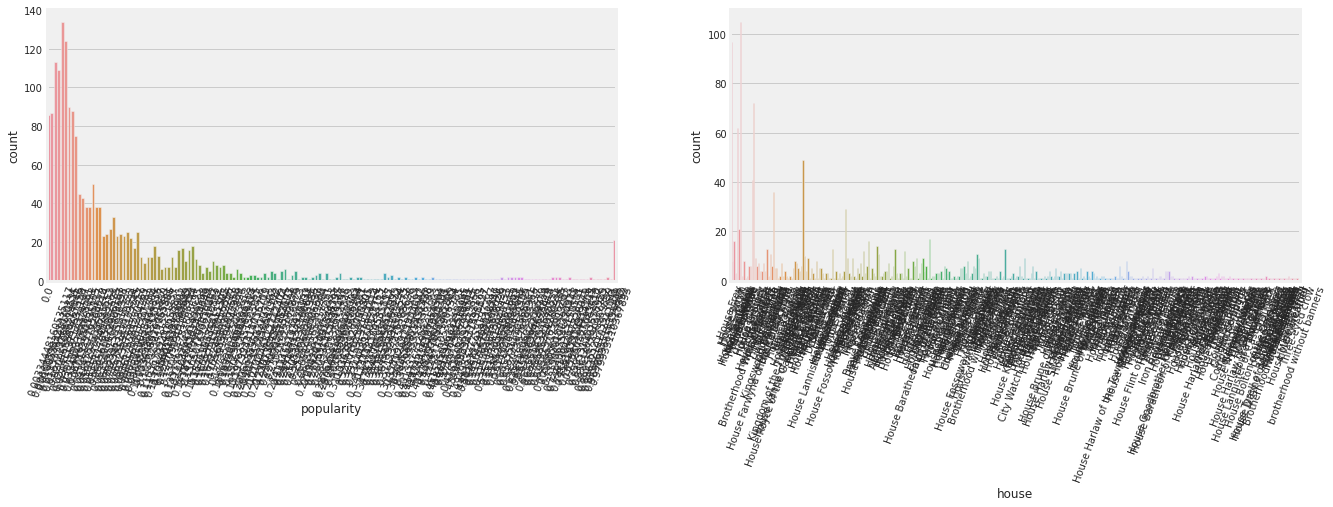

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(ddf['popularity'])
plt.xticks(rotation=70)
plt.subplot(1,2,2)
sns.countplot(ddf['house']);
plt.xticks(rotation=70);

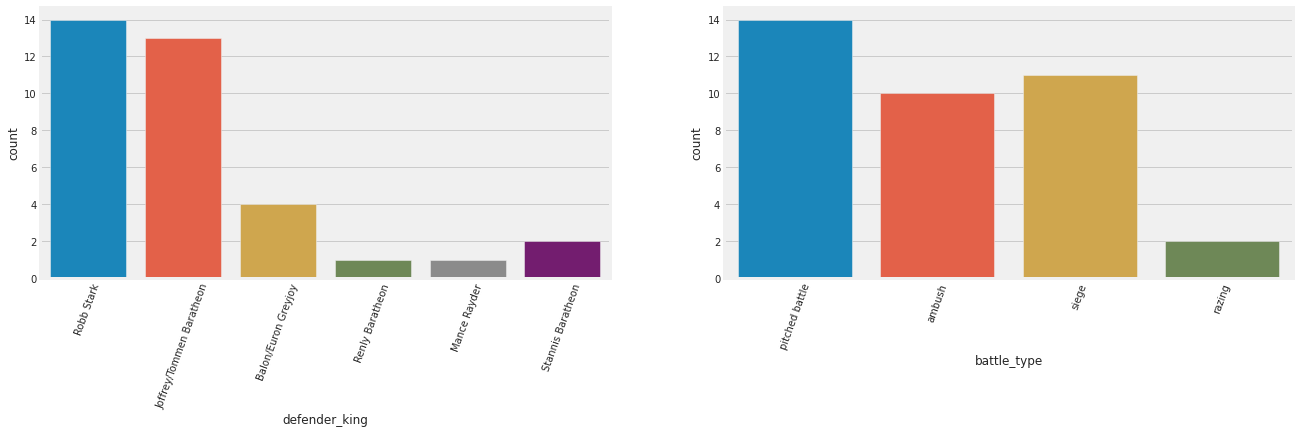

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(bdf['defender_king'])
plt.xticks(rotation=70)
plt.subplot(1,2,2)
sns.countplot(bdf['battle_type']);
plt.xticks(rotation=70);

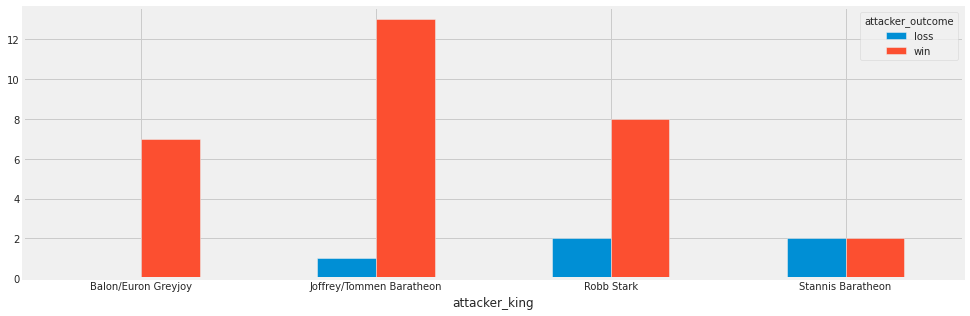

In [50]:
pd.crosstab(bdf['attacker_king'],bdf['attacker_outcome']).plot(kind='bar',figsize=(15,5));
plt.xticks(rotation='horizontal');

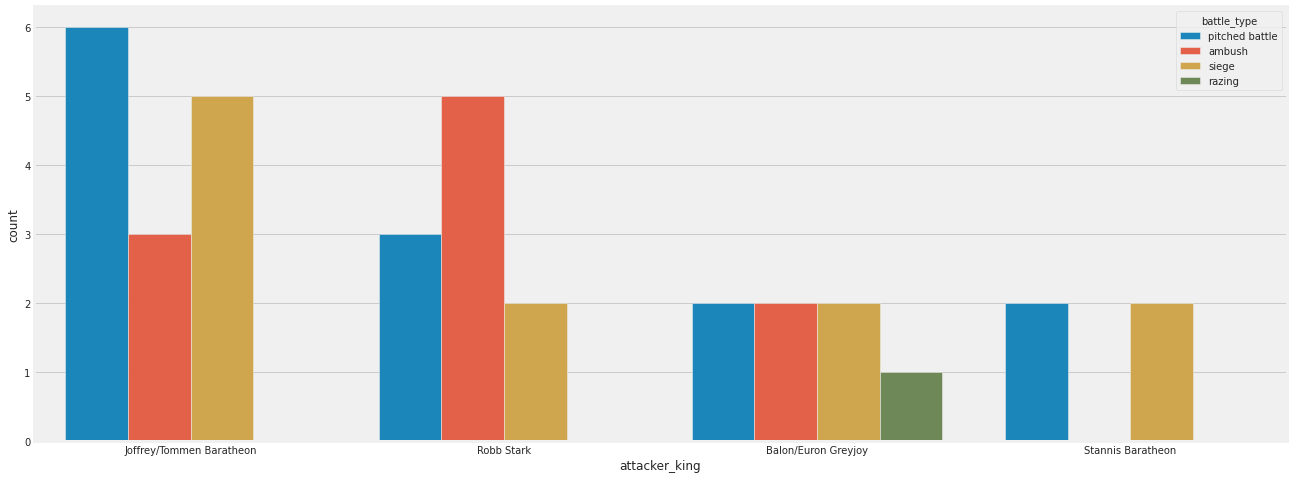

In [51]:
#find attacjer king and battles type
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['battle_type']);

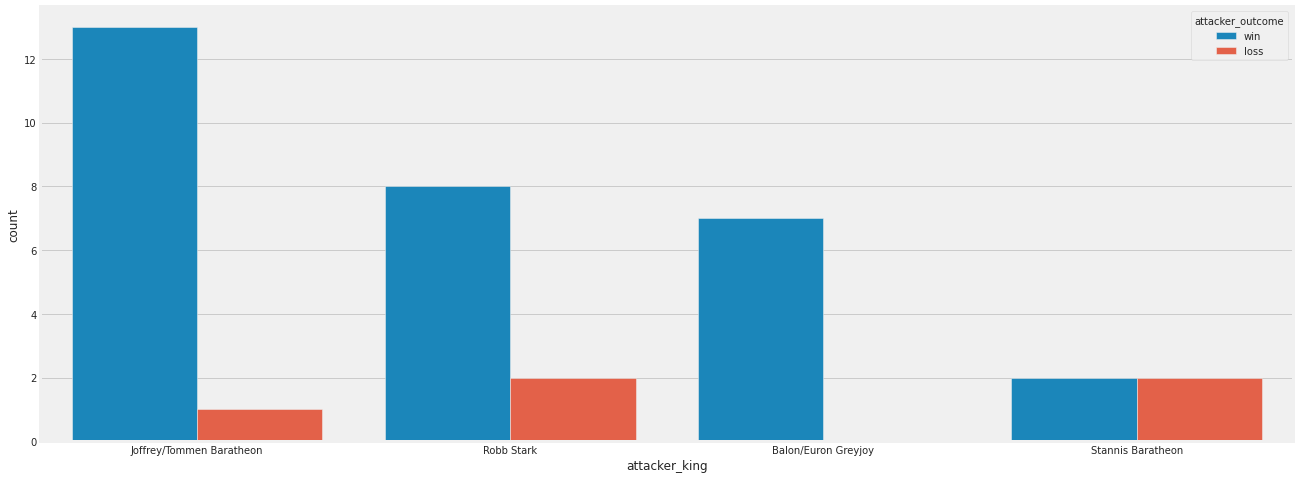

In [52]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['attacker_outcome']);

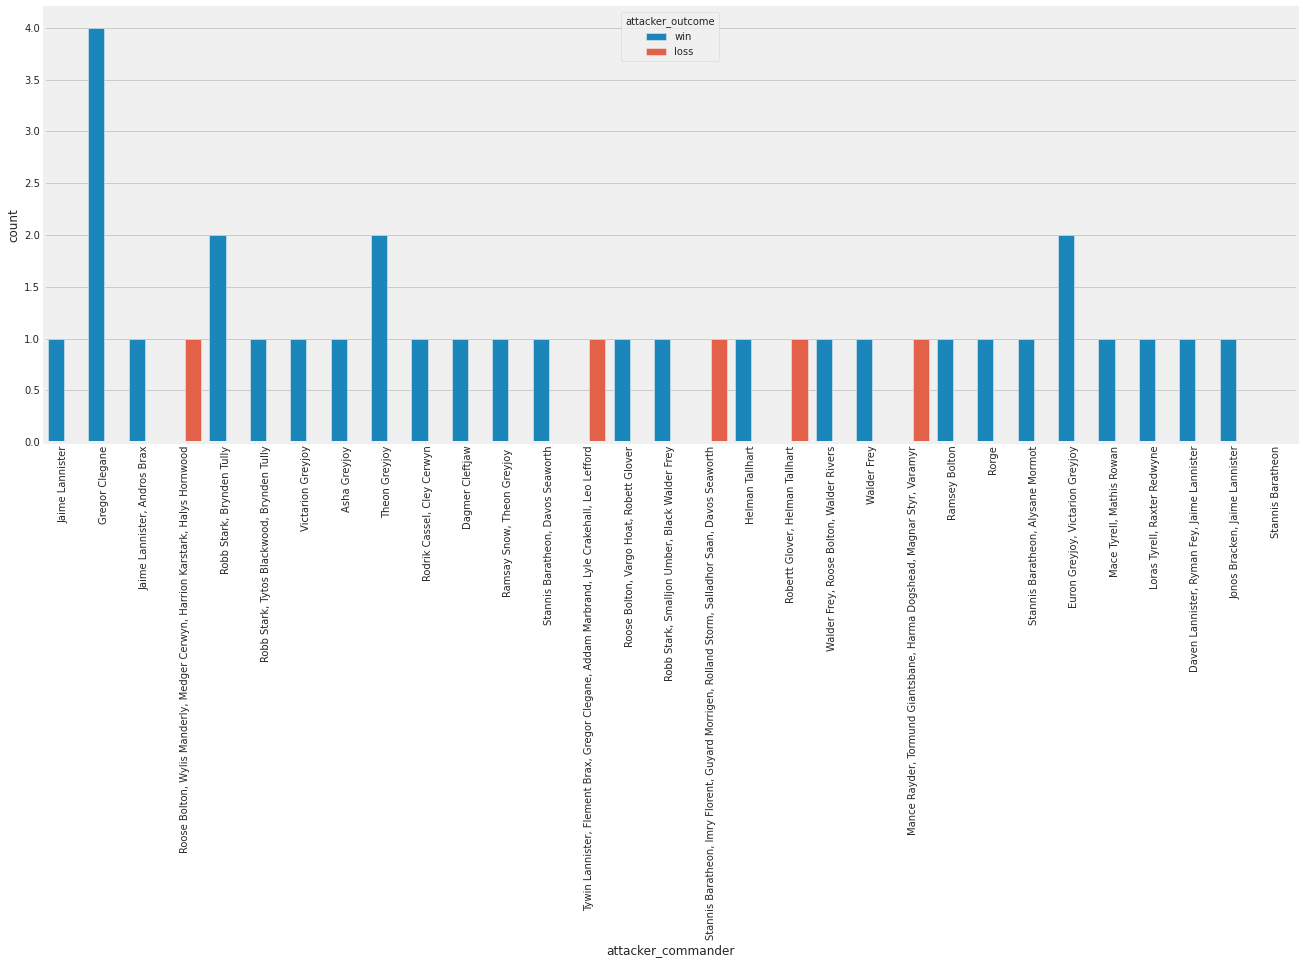

In [53]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_commander'],hue=bdf['attacker_outcome']);
plt.xticks(rotation=90);

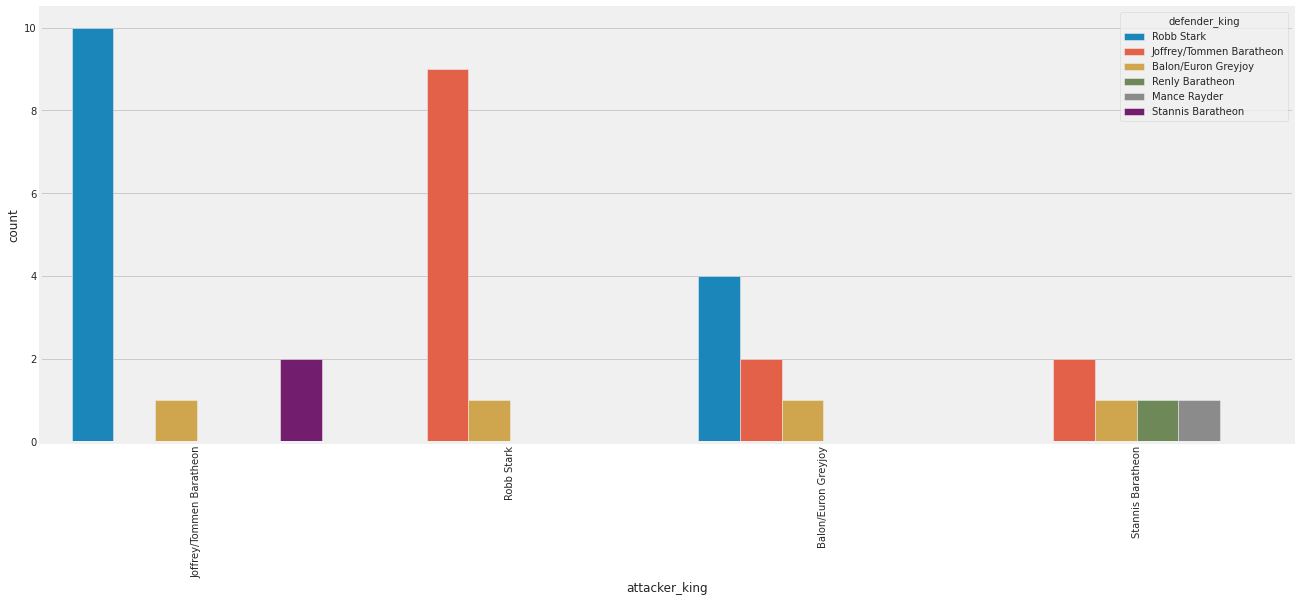

In [54]:
plt.figure(figsize=(20,8))
sns.countplot(bdf['attacker_king'],hue=bdf['defender_king']);
plt.xticks(rotation=90);

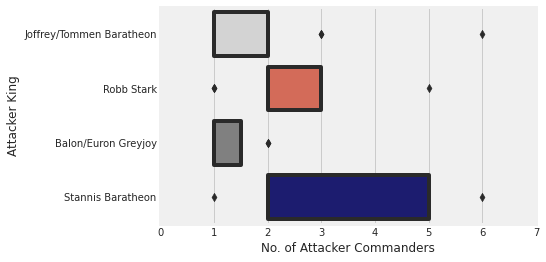

In [55]:
bdf.loc[:, "totaldefender"] = (4 - bdf[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
bdf.loc[:, "totalattacker"] = (4 - bdf[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))
bdf.loc[:, "totalcommon"] = [len(x) if type(x) == list else np.nan for x in bdf.attacker_commander.str.split(",")]
p = sns.boxenplot("totalcommon", "attacker_king", data = bdf, saturation = .6,palette = ["lightgray", sns.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "No. of Attacker Commanders", ylabel = "Attacker King", xticks = range(8))

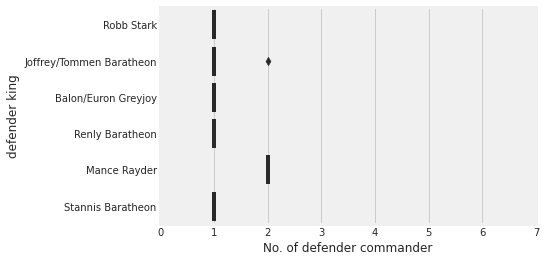

In [57]:
p = sns.boxenplot("totaldefender", "defender_king", data = bdf, saturation = .6,palette = ["lightgray", sns.color_palette()[1], "grey", "darkblue"])
_ = p.set(xlabel = "No. of defender commander", ylabel = "defender king", xticks = range(8))

In [59]:
bdf['attacker_size'].mean()


9942.541666666666

In [60]:
ddf['popularity'].mean()

0.08958432871476318

In [61]:
cddf['Book Intro Chapter'].mean()

28.861878453038674

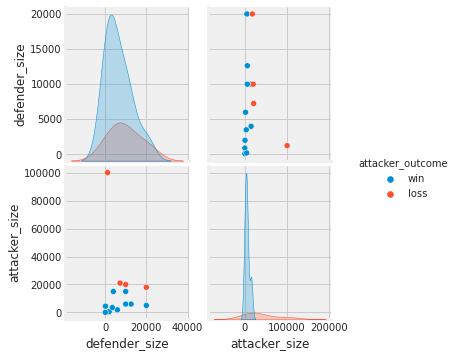

In [62]:
nbdf = bdf[['defender_size','attacker_size','attacker_outcome']].dropna()
nbdf.reset_index(inplace=True)
nbdf = nbdf.iloc[:,1:]
sns.pairplot(nbdf, hue='attacker_outcome');

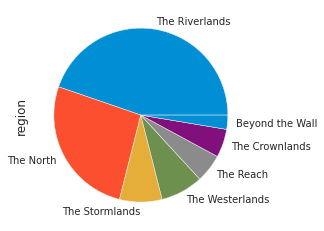

In [63]:
bdf['region'].value_counts().plot(kind = 'pie');


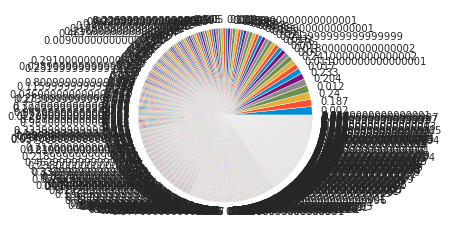

In [65]:
ddf['plod'].value_counts().plot(kind = 'pie');


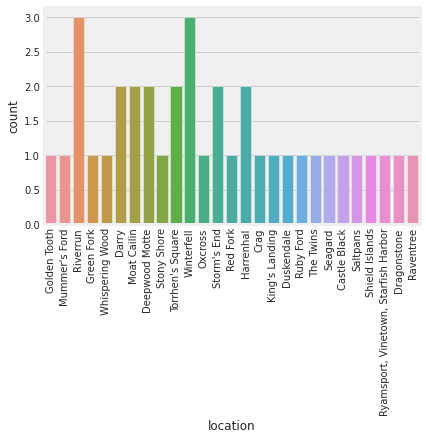

In [66]:
sns.countplot(x=bdf['location'])
plt.xticks(rotation=90);

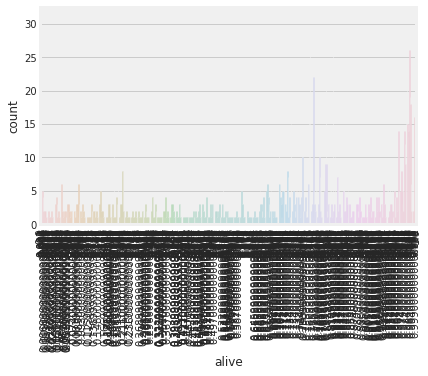

In [67]:
sns.countplot(x=ddf['alive'])
plt.xticks(rotation=90);

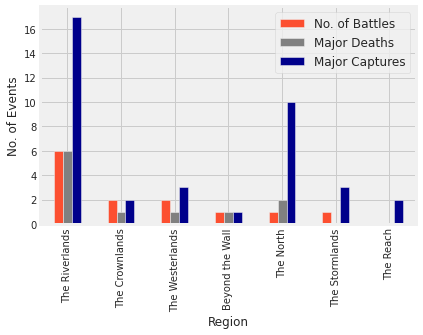

In [68]:
data = bdf.groupby("region").sum()[["major_death", "major_capture"]]
p = pd.concat([data, bdf.region.value_counts().to_frame()], axis = 1).sort_values("major_death", ascending = False).copy(deep = True).plot.bar(color = [sns.color_palette()[1], 
"grey", "darkblue"], rot = 0)
_ = p.set(xlabel = "Region", ylabel = "No. of Events"), p.legend(["No. of Battles", "Major Deaths", "Major Captures"], fontsize = 12.)
plt.xticks(rotation=90);

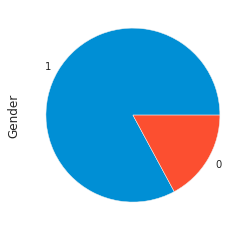

In [69]:
cddf['Allegiances'] = cddf['Allegiances'].apply(lambda x : 'House Martell' if(x == 'Martell') else 'House Stark' if(x=='Stark') else 'House Targaryen' if(x=='Targaryen') else 'House Tully' if(x=='Tully') else 'House Tyrell' if(x=='Tyrell') else x)
cddf['Gender'].value_counts().plot(kind = 'pie');

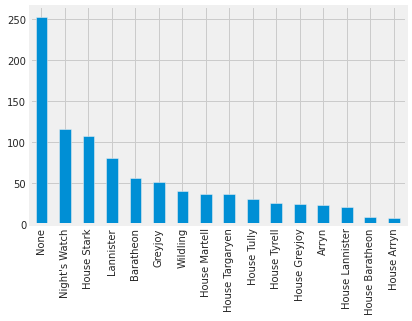

In [70]:
cddf['Allegiances'].value_counts().plot(kind = 'bar', stacked='True');

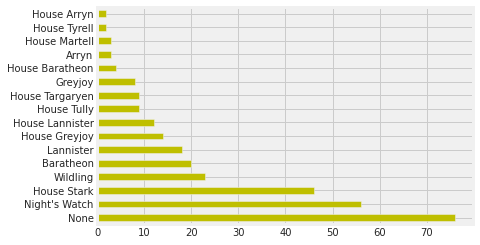

In [71]:
cddf[cddf['Death Year'].notnull()]['Allegiances'].value_counts().plot(kind = 'barh',color='y');

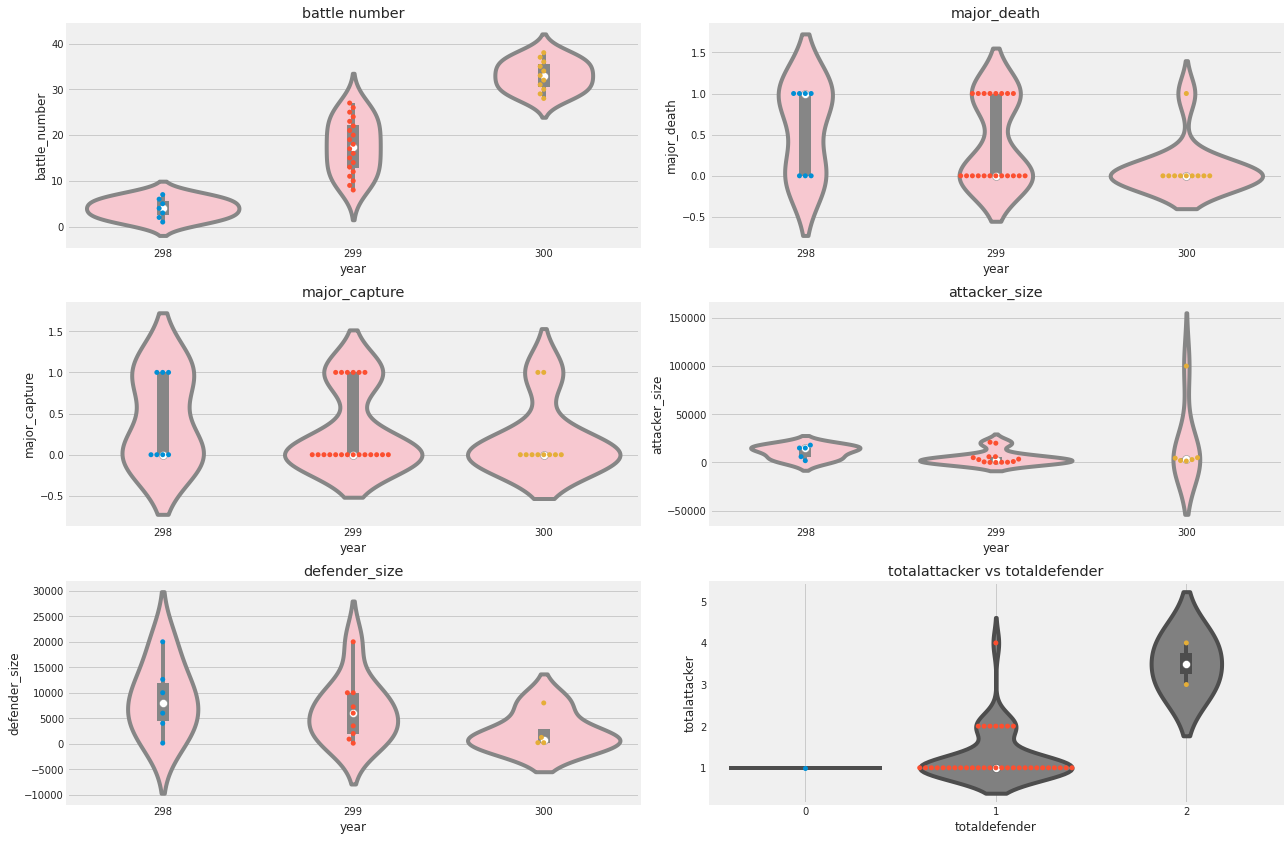

In [72]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
sns.violinplot(x="year", y="battle_number", data=bdf,color = 'pink',ax=axes[0][0]).set_title('battle number')
sns.swarmplot(x="year", y="battle_number", data=bdf,ax = axes[0][0])

sns.violinplot(x="year", y="major_death", data=bdf,color = 'pink',ax=axes[0][1]).set_title('major_death')
sns.swarmplot(x="year", y="major_death", data=bdf,ax = axes[0][1])

sns.violinplot(x="year", y="major_capture", data=bdf,color = 'pink',ax=axes[1][0]).set_title('major_capture')
sns.swarmplot(x="year", y="major_capture", data=bdf,ax = axes[1][0])

sns.violinplot(x="year", y="attacker_size", data=bdf,color = 'pink',ax=axes[1][1]).set_title('attacker_size')
sns.swarmplot(x="year", y="attacker_size", data=bdf,ax = axes[1][1])

sns.violinplot(x="year", y="defender_size", data=bdf,color = 'pink',ax=axes[2][0]).set_title('defender_size')
sns.swarmplot(x="year", y="defender_size", data=bdf,ax = axes[2][0])

sns.violinplot(x="totaldefender", y="totalattacker", data=bdf,color = 'gray',ax=axes[2][1]).set_title('totalattacker vs totaldefender')
sns.swarmplot(x="totaldefender", y="totalattacker", data=bdf,ax = axes[2][1])

plt.grid()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()